In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
xls = pd.ExcelFile('InsuranceTransactionsData.xlsx')
transactions = pd.read_excel(xls, 'CustomerTransactions2')
policies = pd.read_excel(xls, 'PolicyInfo')

In [4]:
from dython import nominal

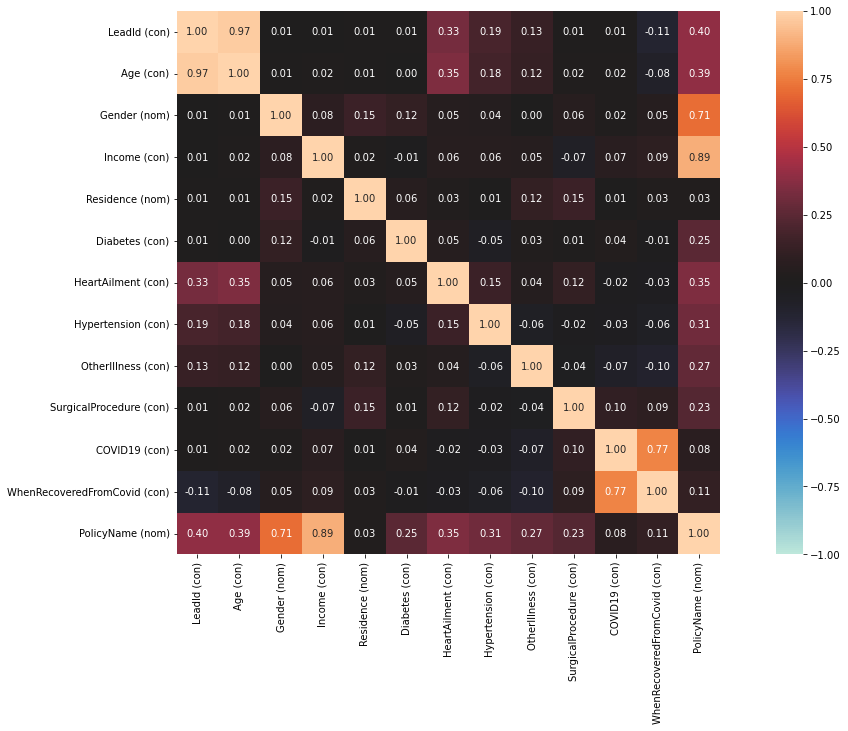

In [5]:
nominal.associations(transactions,figsize=(20,10),mark_columns=True);

In [6]:
transactions.head()

,LeadId,Age,Gender,Income,Residence,Diabetes,HeartAilment,Hypertension,OtherIllness,SurgicalProcedure,COVID19,WhenRecoveredFromCovid,PolicyName
0,176,43,Male,300000,Metro,0,0,1,0,0,0,0,Policy_1
1,58,32,Female,300000,Non-Metro,0,0,1,0,0,0,0,Policy_10
2,17,29,Male,1100000,Metro,0,0,0,1,1,1,4,Policy_3
3,215,50,Male,300000,Metro,0,0,1,0,0,1,1,Policy_1
4,34,25,Male,1400000,Non-Metro,0,0,0,0,1,0,0,Policy_4


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
transactions['Gender']= label_encoder.fit_transform(transactions['Gender'])
transactions['Residence']= label_encoder.fit_transform(transactions['Residence'])

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LeadId                  250 non-null    int64 
 1   Age                     250 non-null    int64 
 2   Gender                  250 non-null    int32 
 3   Income                  250 non-null    int64 
 4   Residence               250 non-null    int32 
 5   Diabetes                250 non-null    int64 
 6   HeartAilment            250 non-null    int64 
 7   Hypertension            250 non-null    int64 
 8   OtherIllness            250 non-null    int64 
 9   SurgicalProcedure       250 non-null    int64 
 10  COVID19                 250 non-null    int64 
 11  WhenRecoveredFromCovid  250 non-null    int64 
 12  PolicyName              250 non-null    object
dtypes: int32(2), int64(10), object(1)
memory usage: 23.6+ KB


In [9]:
transactions['PolicyName']= transactions['PolicyName'].str.replace("Policy_", "").astype("int")

In [10]:
transactions.head()

,LeadId,Age,Gender,Income,Residence,Diabetes,HeartAilment,Hypertension,OtherIllness,SurgicalProcedure,COVID19,WhenRecoveredFromCovid,PolicyName
0,176,43,1,300000,0,0,0,1,0,0,0,0,1
1,58,32,0,300000,1,0,0,1,0,0,0,0,10
2,17,29,1,1100000,0,0,0,0,1,1,1,4,3
3,215,50,1,300000,0,0,0,1,0,0,1,1,1
4,34,25,1,1400000,1,0,0,0,0,1,0,0,4


In [11]:
features = []
for i in range(1, len(transactions.columns) - 1):
    features.append(transactions.columns[i])
features

['Age',
 'Gender',
 'Income',
 'Residence',
 'Diabetes',
 'HeartAilment',
 'Hypertension',
 'OtherIllness',
 'SurgicalProcedure',
 'COVID19',
 'WhenRecoveredFromCovid']

In [12]:
X = transactions.loc[:, features]
y = transactions.loc[:, ["PolicyName"]]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, train_size = .75)

In [32]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.5873015873015873

In [33]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 7,  3,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  3,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [34]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

C:\Users\navya\AppData\Local\Temp/ipykernel_13204/2576700341.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.6507936507936508

In [35]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

C:\Users\navya\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6349206349206349

In [36]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

C:\Users\navya\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6031746031746031